In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, f1_score, accuracy_score, recall_score, precision_score, auc, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

In [7]:
from scipy.io import arff
data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])

In [8]:
col_names = ['qual_assess','pre_screen','MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9','MA_detection_1.0','exudate_detection_.3','exudate_detection_.4','exudate_detection_.5','exudate_detection_.6'
             ,'exudate_detection_.7','exudate_detection_.8','exudate_detection_.9','exudate_detection_1.0',
             'euc_dist','diam_opt_disc','AM/FM','class_label']
df.columns = col_names

In [9]:
df.class_label = df.class_label.apply(lambda x: pd.to_numeric(str(x)[2]))

In [10]:
df.corr()

,qual_assess,pre_screen,MA_detection_.5,MA_detection_.6,MA_detection_.7,MA_detection_.8,MA_detection_.9,MA_detection_1.0,exudate_detection_.3,exudate_detection_.4,exudate_detection_.5,exudate_detection_.6,exudate_detection_.7,exudate_detection_.8,exudate_detection_.9,exudate_detection_1.0,euc_dist,diam_opt_disc,AM/FM,class_label
qual_assess,1.000000,-0.017611,0.035576,0.035929,0.033395,0.036506,0.034817,0.031889,0.063597,0.063061,0.044449,0.027656,0.013336,0.011864,0.012695,0.012289,-0.021943,-0.067325,-0.051723,0.062816
pre_screen,-0.017611,1.000000,0.053300,0.054839,0.053056,0.059063,0.060557,0.060152,0.062930,0.052453,0.053534,0.041607,0.015900,0.018950,0.023268,0.023861,0.004751,-0.079577,0.010782,-0.076925
MA_detection_.5,0.035576,0.053300,1.000000,0.996177,0.985730,0.963149,0.925274,0.859620,-0.229653,-0.103047,-0.044650,0.103035,0.134464,0.142917,0.196550,0.208422,0.000001,0.033992,-0.344317,0.292603
MA_detection_.6,0.035929,0.054839,0.996177,1.000000,0.994221,0.977030,0.944504,0.883511,-0.244704,-0.115253,-0.058364,0.086486,0.117895,0.124198,0.172633,0.185645,0.001953,0.034714,-0.360716,0.266338
MA_detection_.7,0.033395,0.053056,0.985730,0.994221,1.000000,0.991821,0.968676,0.916198,-0.283188,-0.139111,-0.086595,0.057769,0.094513,0.098859,0.140774,0.156441,0.000387,0.030396,-0.389384,0.234691
MA_detection_.8,0.036506,0.059063,0.963149,0.977030,0.991821,1.000000,0.988294,0.947860,-0.309950,-0.160011,-0.109946,0.029768,0.067477,0.069797,0.102638,0.119405,0.001520,0.016854,-0.411806,0.197511
MA_detection_.9,0.034817,0.060557,0.925274,0.944504,0.968676,0.988294,1.000000,0.974577,-0.349811,-0.197279,-0.152578,-0.020469,0.022265,0.024959,0.050579,0.070735,-0.001725,0.010961,-0.437036,0.161631
MA_detection_1.0,0.031889,0.060152,0.859620,0.883511,0.916198,0.947860,0.974577,1.000000,-0.375506,-0.223681,-0.181197,-0.058153,-0.012400,-0.012175,0.006868,0.031520,-0.002557,-0.011607,-0.435127,0.127861
exudate_detection_.3,0.063597,0.062930,-0.229653,-0.244704,-0.283188,-0.309950,-0.349811,-0.375506,1.000000,0.767091,0.763409,0.486606,0.163915,0.132227,0.114722,0.084682,-0.086155,-0.086474,0.390304,0.058015
exudate_detection_.4,0.063061,0.052453,-0.103047,-0.115253,-0.139111,-0.160011,-0.197279,-0.223681,0.767091,1.000000,0.919589,0.624537,0.257159,0.216127,0.181431,0.139196,-0.128990,-0.090721,0.291554,0.000479


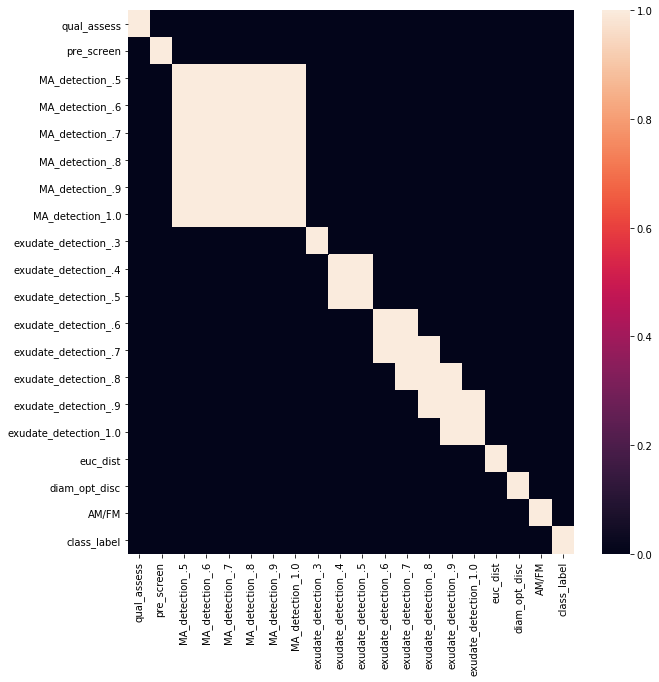

In [11]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr() > .8)

In [12]:
df_MA5 = df.copy()
df_MA6 = df.copy()
df_MA7 = df.copy()
df_MA8 = df.copy()
df_MA9 = df.copy()
df_MA10 = df.copy()

In [13]:
drop_5 = ['MA_detection_1.0','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_6 = ['MA_detection_.5','MA_detection_1.0','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_7 = ['MA_detection_.5','MA_detection_.6','MA_detection_1.0','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_8 = ['MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_1.0',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_9 = ['MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_1.0', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_10 = ['MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']

In [14]:
df_MA5.drop(columns = drop_5, inplace = True)
df_MA6.drop(columns = drop_6, inplace = True)
df_MA7.drop(columns = drop_7, inplace = True)
df_MA8.drop(columns = drop_8, inplace = True)
df_MA9.drop(columns = drop_9, inplace = True)
df_MA10.drop(columns = drop_10, inplace = True)

In [15]:
print(df_MA5.columns)
print(df_MA6.columns)
print(df_MA7.columns)
print(df_MA8.columns)
print(df_MA9.columns)
print(df_MA10.columns)

Index(['qual_assess', 'pre_screen', 'MA_detection_.5', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 'MA_detection_.6', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 'MA_detection_.7', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 'MA_detection_.8', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 

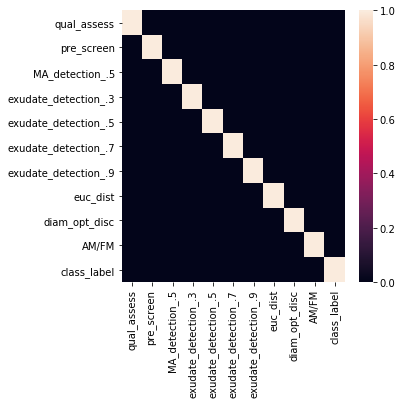

In [16]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(df_MA5.corr() > .8)

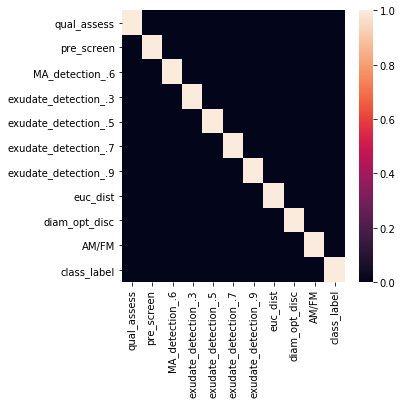

In [17]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(df_MA6.corr() > .8)

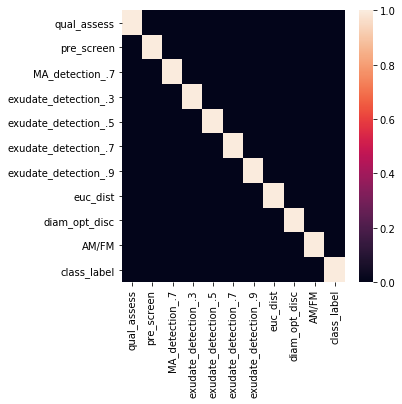

In [18]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(df_MA7.corr() > .8)

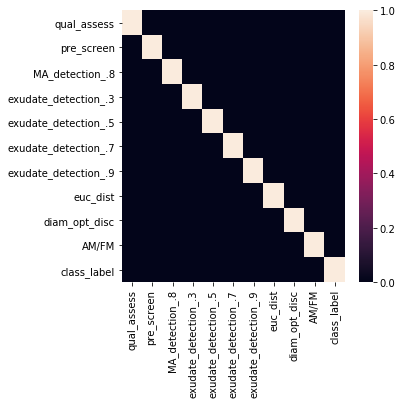

In [19]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(df_MA8.corr() > .8)

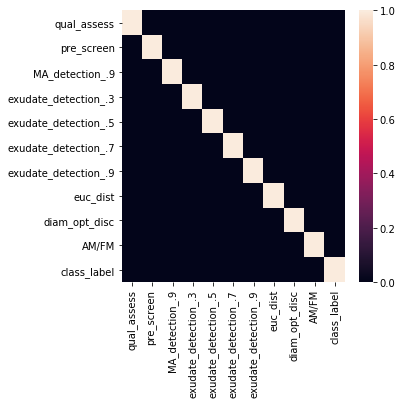

In [20]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(df_MA9.corr() > .8)

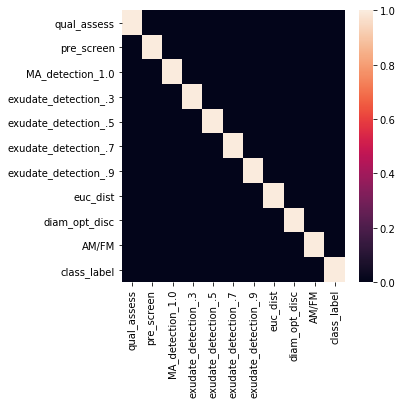

In [21]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(df_MA10.corr() > .8)

In [22]:
X = df.iloc[:,0:-1]
y = df.class_label

X_MA5 = df_MA5.iloc[:,0:-1]
y_MA5 = df_MA5.class_label

X_MA6 = df_MA6.iloc[:,0:-1]
y_MA6 = df_MA6.class_label

X_MA7 = df_MA7.iloc[:,0:-1]
y_MA7 = df_MA7.class_label

X_MA8 = df_MA8.iloc[:,0:-1]
y_MA8 = df_MA8.class_label

X_MA9 = df_MA9.iloc[:,0:-1]
y_MA9 = df_MA9.class_label

X_MA10 = df_MA10.iloc[:,0:-1]
y_MA10 = df_MA10.class_label

In [23]:
X_train_MA5, X_test_MA5, y_train_MA5, y_test_MA5 = train_test_split(X_MA5,y_MA5, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA5)

X_train_MA6, X_test_MA6, y_train_MA6, y_test_MA6 = train_test_split(X_MA6,y_MA6, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA6)

X_train_MA7, X_test_MA7, y_train_MA7, y_test_MA7 = train_test_split(X_MA7,y_MA7, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA7)

X_train_MA8, X_test_MA8, y_train_MA8, y_test_MA8 = train_test_split(X_MA8,y_MA8, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA8)

X_train_MA9, X_test_MA9, y_train_MA9, y_test_MA9 = train_test_split(X_MA9,y_MA9, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA9)

X_train_MA10, X_test_MA10, y_train_MA10, y_test_MA10 = train_test_split(X_MA10,y_MA10, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA10)

In [26]:
dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X, y)
dummy_predict = dummy.predict(X)

print('Test Accuracy score: ', accuracy_score(y, dummy_predict))
print('Test F1 score: ', f1_score(y, dummy_predict))


Test Accuracy score:  0.5308427454387489
Test F1 score:  0.6935300794551646


In [28]:
baseline_accuracy = accuracy_score(y, dummy_predict)

In [29]:
train_sets = {'MA=.5_train':(X_train_MA5,y_train_MA5),
              'MA=.6_train':(X_train_MA6,y_train_MA6),
              'MA=.7_train':(X_train_MA7,y_train_MA7),
              'MA=.8_train':(X_train_MA8,y_train_MA8),
              'MA=.9_train':(X_train_MA9,y_train_MA9),
              'MA=1.0_train':(X_train_MA10,y_train_MA10)}

test_sets = {'MA=.5_test':(X_test_MA5,y_test_MA5),
             'MA=.6_test':(X_test_MA6,y_test_MA6),
             'MA=.7_test':(X_test_MA7,y_test_MA7),
             'MA=.8_test':(X_test_MA8,y_test_MA8),
             'MA=.9_test':(X_test_MA9,y_test_MA9),
             'MA=1.0_test':(X_test_MA10,y_test_MA10)}

In [30]:
preprocess_dict = {}
for key, val in train_sets.items():
    numerical = list(val[0].iloc[:,2:9].columns)
    preprocess_dict[key+'_scaled'] = make_column_transformer((StandardScaler(),numerical),
                                                            remainder = 'passthrough')
    
    

## Logisitc Regression

In [31]:
LR_best_scores = {}
for key, val in train_sets.items():
    preprocess = preprocess_dict[key+'_scaled']
    model = make_pipeline(preprocess, PCA(),LogisticRegression(solver = 'liblinear'))
    params = {
              'pca__n_components': [5,6,7,8,9,None], 
              'logisticregression__penalty':['l1','l2'],
              'logisticregression__C':[100,10,1,.1,.01,.001],
              'logisticregression__fit_intercept':[False,True]
             }

    search_lr = GridSearchCV(estimator = model, param_grid = params,
                     cv = 5, return_train_score = True,
                      n_jobs = -1)

    search_lr.fit(val[0], val[1])
    LR_best_scores[key] = {'model':search_lr, 'best_params':search_lr.best_params_,
                           'best_score':search_lr.best_score_}
    
    

In [32]:
for key in train_sets.keys():
    print(key, ': ',LR_best_scores[key]['best_score'])

MA=.5_train :  0.6608695652173913
MA=.6_train :  0.6554347826086957
MA=.7_train :  0.6467391304347826
MA=.8_train :  0.6402173913043478
MA=.9_train :  0.6434782608695652
MA=1.0_train :  0.6260869565217392


In [33]:
LR_best_scores['MA=.5_train']['best_params']

{'logisticregression__C': 100,
 'logisticregression__fit_intercept': False,
 'logisticregression__penalty': 'l1',
 'pca__n_components': 9}

In [34]:
y_hat_test_MA5_LR = LR_best_scores['MA=.5_train']['model'].predict(X_test_MA5)
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test_MA5,y_hat_test_MA5_LR))
print('Precision Score: ', precision_score(y_test_MA5,y_hat_test_MA5_LR))
print('Recall Score: ', recall_score(y_test_MA5,y_hat_test_MA5_LR))
print('F1 Score: ',f1_score(y_test_MA5,y_hat_test_MA5_LR))

Logistic Regression
Accuracy Score:  0.6926406926406926
Precision Score:  0.8611111111111112
Recall Score:  0.5040650406504065
F1 Score:  0.635897435897436


In [52]:
y_score_LR = LR_best_scores['MA=.5_train']['model'].decision_function(X_test_MA5)
fpr_LR, tpr_LR, thresholds = roc_curve(y_test_MA5, y_score_LR)


AUC: 0.7192863595302621


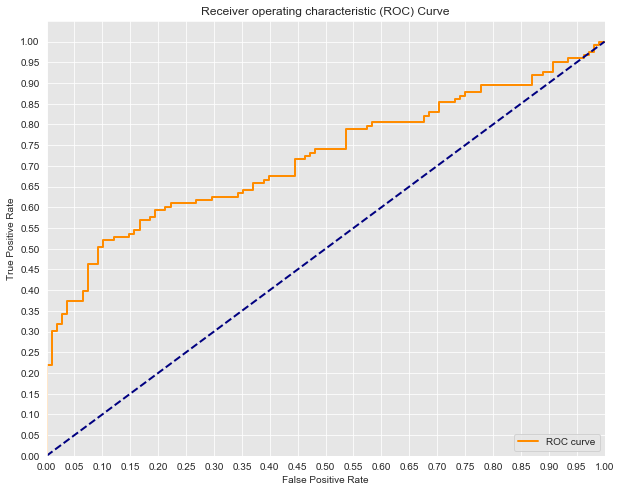

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr_LR, tpr_LR)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_LR, tpr_LR, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## KNN

In [36]:
KNN_best_scores = {}
for key, val in train_sets.items():
    preprocess = preprocess_dict[key+'_scaled']
    model = make_pipeline(preprocess,PCA(), KNeighborsClassifier())
    params = {
              'pca__n_components': [3,4,5,6,7,8,9,None], 
              'kneighborsclassifier__n_neighbors': [2,3,4,5,8,9,16,17], 
              'kneighborsclassifier__weights': ['uniform','distance'],
              'kneighborsclassifier__p':[1,2,3]
             }

    search_knn = GridSearchCV(estimator = model, param_grid = params,
                     cv = 5, return_train_score = True,
                      n_jobs = -1)

    search_knn.fit(val[0], val[1])
    KNN_best_scores[key] = {'model':search_knn, 'best_params':search_knn.best_params_,
                           'best_score':search_knn.best_score_}
    

In [37]:
for key in train_sets.keys():
    print(key, ': ',KNN_best_scores[key]['best_score'])

MA=.5_train :  0.6630434782608695
MA=.6_train :  0.65
MA=.7_train :  0.6423913043478261
MA=.8_train :  0.6510869565217391
MA=.9_train :  0.6347826086956522
MA=1.0_train :  0.6282608695652174


In [38]:
KNN_best_scores['MA=.5_train']['best_params']

{'kneighborsclassifier__n_neighbors': 3,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform',
 'pca__n_components': 6}

In [39]:
y_hat_test_MA5_KNN = KNN_best_scores['MA=.5_train']['model'].predict(X_test_MA5)
print('KNN')
print('Accuracy Score: ', accuracy_score(y_test_MA5,y_hat_test_MA5_KNN))
print('Precision Score: ', precision_score(y_test_MA5,y_hat_test_MA5_KNN))
print('Recall Score: ', recall_score(y_test_MA5,y_hat_test_MA5_KNN))
print('F1 Score: ',f1_score(y_test_MA5,y_hat_test_MA5_KNN))

KNN
Accuracy Score:  0.6536796536796536
Precision Score:  0.6972477064220184
Recall Score:  0.6178861788617886
F1 Score:  0.6551724137931035


In [54]:
y_scores_KNN = KNN_best_scores['MA=.5_train']['model'].predict_proba(X_test_MA5)
fpr_KNN, tpr_KNN, threshold_KNN = roc_curve(y_test_MA5, y_scores_KNN[:, 1])

In [82]:
KNN_best_scores['MA=.5_train']['model'].predict_proba(X_test_MA5)

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.

AUC: 0.6892125865703101


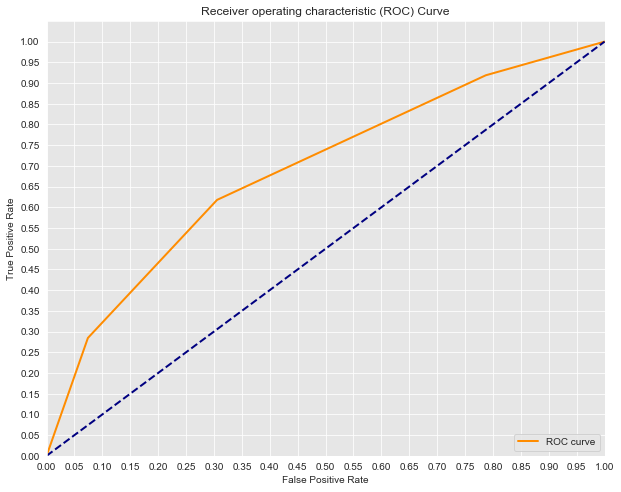

In [55]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr_KNN, tpr_KNN)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_KNN, tpr_KNN, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forests

In [48]:
RF_best_scores = {}

for key, val in train_sets.items():
    preprocess = preprocess_dict[key+'_scaled']
    model = make_pipeline(preprocess,RandomForestClassifier(n_estimators = 500))
    params = { 
            
              'randomforestclassifier__max_depth': [None, 3,5,8,15,20],
              'randomforestclassifier__max_features':['log2','sqrt',None],
              'randomforestclassifier__min_samples_leaf':[10,20,40,80,100,150,200]}

    search_rf = GridSearchCV(estimator = model, param_grid = params,
                     cv = 5, return_train_score = True,
                      n_jobs = -1)

    search_rf.fit(val[0], val[1])
    RF_best_scores[key] = {'model':search_rf, 'best_params':search_rf.best_params_,
                           'best_score':search_rf.best_score_}
    

In [49]:
for key in train_sets.keys():
    print(key, ': ',RF_best_scores[key]['best_score'])

MA=.5_train :  0.6804347826086956
MA=.6_train :  0.6760869565217391
MA=.7_train :  0.675
MA=.8_train :  0.6608695652173913
MA=.9_train :  0.657608695652174
MA=1.0_train :  0.6597826086956522


In [50]:
RF_best_scores['MA=.5_train']['best_params']

{'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 10}

In [51]:
y_hat_test_MA5_RF = RF_best_scores['MA=.5_train']['model'].predict(X_test_MA5)
print('Random Forests')
print('Accuracy Score: ', accuracy_score(y_test_MA5,y_hat_test_MA5_RF))
print('Precision Score: ', precision_score(y_test_MA5,y_hat_test_MA5_RF))
print('Recall Score: ', recall_score(y_test_MA5,y_hat_test_MA5_RF))
print('F1 Score: ',f1_score(y_test_MA5,y_hat_test_MA5_RF))

Random Forests
Accuracy Score:  0.6277056277056277
Precision Score:  0.6796116504854369
Recall Score:  0.5691056910569106
F1 Score:  0.6194690265486726


In [62]:
y_scores_RF = RF_best_scores['MA=.5_train']['model'].predict_proba(X_test_MA5)
fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test_MA5, y_scores_RF[:, 1])

AUC: 0.7053598313760916


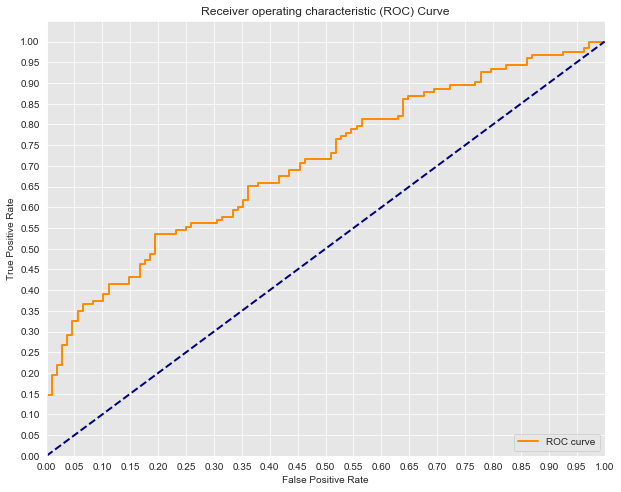

In [63]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr_RF, tpr_RF)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_RF, tpr_RF, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## SVM

In [44]:
SVM_best_scores = {}

for key, val in train_sets.items():
    preprocess = preprocess_dict[key+'_scaled']
    model = make_pipeline(preprocess, SVC())
    params = {
              
              'svc__C': [.01,.01,.1,1,10,100,1000],
              'svc__gamma':['auto',.0001,.001,.01,.1,1,10,100], 
              'svc__class_weight':['balanced',None]
              }

    search_svm = GridSearchCV(estimator = model, param_grid = params,
                     cv = 5, return_train_score = True,
                      n_jobs = -1)

    search_svm.fit(val[0], val[1])
    SVM_best_scores[key] = {'model':search_svm, 'best_params':search_svm.best_params_,
                           'best_score':search_svm.best_score_}
    

In [45]:
for key in train_sets.keys():
    print(key, ': ',SVM_best_scores[key]['best_score'])

MA=.5_train :  0.6771739130434783
MA=.6_train :  0.6652173913043479
MA=.7_train :  0.657608695652174
MA=.8_train :  0.6489130434782608
MA=.9_train :  0.6434782608695652
MA=1.0_train :  0.6402173913043478


In [46]:
SVM_best_scores['MA=.5_train']['best_params']

{'svc__C': 1000, 'svc__class_weight': 'balanced', 'svc__gamma': 0.001}

In [47]:
y_hat_test_MA5_SVM = SVM_best_scores['MA=.5_train']['model'].predict(X_test_MA5)
print('Random Forests')
print('Accuracy Score: ', accuracy_score(y_test_MA5,y_hat_test_MA5_SVM))
print('Precision Score: ', precision_score(y_test_MA5,y_hat_test_MA5_SVM))
print('Recall Score: ', recall_score(y_test_MA5,y_hat_test_MA5_SVM))
print('F1 Score: ',f1_score(y_test_MA5,y_hat_test_MA5_SVM))

Random Forests
Accuracy Score:  0.670995670995671
Precision Score:  0.7974683544303798
Recall Score:  0.5121951219512195
F1 Score:  0.6237623762376238


In [60]:
y_scores_SVM = SVM_best_scores['MA=.5_train']['model'].decision_function(X_test_MA5)
fpr_SVM, tpr_SVM, threshold_SVM = roc_curve(y_test_MA5, y_scores_SVM)

AUC: 0.7342667871123155


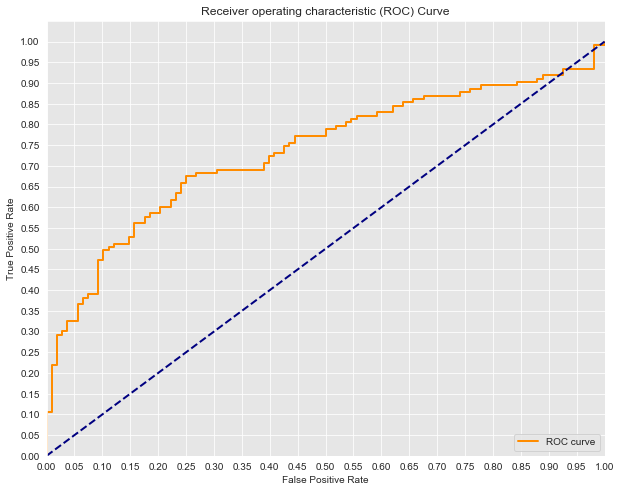

In [61]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr_SVM, tpr_SVM)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_SVM, tpr_SVM, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

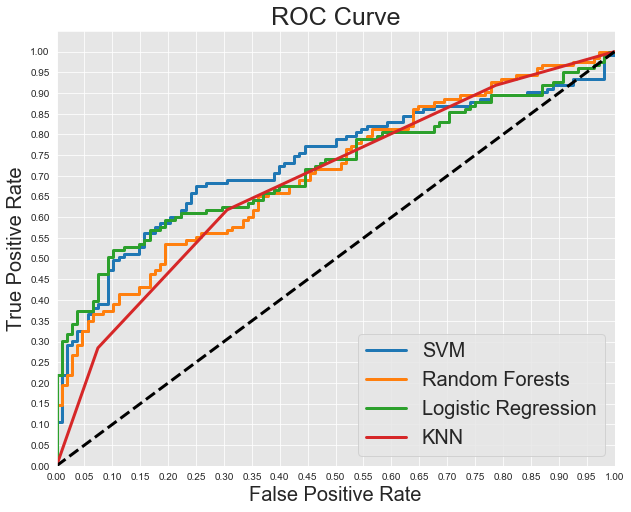

In [83]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


fig = plt.figure(figsize=(10,8))
lw = 3
plt.plot(fpr_SVM, tpr_SVM,
         lw=lw, label='SVM')
plt.plot(fpr_RF, tpr_RF,
         lw=lw, label='Random Forests')
plt.plot(fpr_LR, tpr_LR,
         lw=lw, label='Logistic Regression')
plt.plot(fpr_KNN, tpr_KNN,
         lw=lw, label='KNN')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curve',fontsize = 25)
plt.legend(loc="lower right", prop={'size': 20})
plt.show()
fig.savefig('roc.jpeg')

In [87]:
pip install mlxtend

     |████████████████████████████████| 1.3MB 551kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<Figure size 432x288 with 0 Axes>

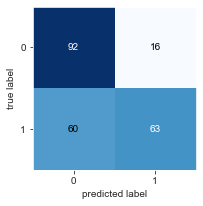

In [108]:
y_true = y_test_MA5
y_pred = SVM_best_scores['MA=.5_train']['model'].predict(X_test_MA5)
cm = confusion_matrix(y_true, y_pred)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig = plt.figure()
plot_confusion_matrix(conf_mat=cm, figsize = (3,3))

plt.show()
fig.savefig('confusion_matrix.jpeg')

In [110]:
classifiers = pd.DataFrame(columns = [['Classifier','Accuracy Score','Precision Score','Recall Score','F1 Score']])
def classifiers_data(Classifier,ID):
    df = pd.DataFrame(columns = [['Classifier','Accuracy Score','Precision Score','Recall Score','F1 Score']])
    if Classifier == 'Baseline':
         df = df.append(pd.Series(['Baseline',\
                              accuracy_score(y, dummy_predict),
                              None,
                              None,
                              f1_score(y, dummy_predict)], index=classifiers.columns), ignore_index=True)
    else:
        if ID == 'LR':
            y_pred = y_hat_test_MA5_LR
        elif ID == 'SVM':
            y_pred = y_hat_test_MA5_SVM
        elif ID == 'KNN':
            y_pred = y_hat_test_MA5_KNN
        elif ID == 'RF':
            y_pred = y_hat_test_MA5_RF
        df = df.append(pd.Series([Classifier,
                                     accuracy_score(y_test_MA5,y_pred),
                                     precision_score(y_test_MA5,y_pred),
                                     recall_score(y_test_MA5,y_pred),
                                     f1_score(y_test_MA5,y_pred)], index=classifiers.columns), ignore_index=True )
    return df
    
classifiers = classifiers.append(classifiers_data('Baseline','Dummy'))
classifiers = classifiers.append(classifiers_data('Logistic Regression','LR'))
classifiers = classifiers.append(classifiers_data('K-Nearest Neighbor','KNN'))
classifiers = classifiers.append(classifiers_data('Random Forrest','RF'))
classifiers = classifiers.append(classifiers_data('Support Vector Machine','SVM'))






In [111]:
classifiers

,Classifier,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Baseline,0.530843,None,None,0.693530
0,Logistic Regression,0.692641,0.861111,0.504065,0.635897
0,K-Nearest Neighbor,0.653680,0.697248,0.617886,0.655172
0,Random Forrest,0.627706,0.679612,0.569106,0.619469
0,Support Vector Machine,0.670996,0.797468,0.512195,0.623762
